<hr style="height: 4px; color: #839D2D; width: 100%; ">

# <font color='#61210B'>Formation OpenClassRooms   -   Parcours DATA ANALYST</font>

<hr style="height: 2px; color: #839D2D; width: 100%; ">

## <font color='#38610B'>Projet VI - Détection de Faux Billets</font>



#### Mission 0 - Analyse / Description Jeu Données 
#### Mission 1 - ACP
#### Mission 2 - Algorythme de Classification :  k-means
#### Mission 3 - Régression Logistique : programme de détection

  
**<font color='#38610B'>- Date : 15 Juin 2019</font>**  
Auteur : Frédéric Boissy
<hr style="height: 4px; color: #839D2D; width: 100%; ">


#### Initialisation (Libraries - Functions - etc...)

In [1]:
# -*- coding: utf8 -*-
from init_libraries import *
from functions      import *
from functions2     import *

import time   # Librairie temps pour calculs durée par exemple
trt_start_time = time.time()

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>M0 - Analyse Jeu de données</u></font> : Dataframe 'df'
#### Détails des zones
- <b>is_genuine :</b> Code "Vrai/Faux"   
- <b>diagonal :</b> La diagonale du billet (en mm)     
- <b>height_left :</b> La hauteur du billet (mesurée sur le côté gauche, en mm)   
- <b>height_right :</b> La hauteur du billet (mesurée sur le côté droit, en mm)   
- <b>margin_low :</b> La marge entre le bord inférieur du billet et l'image de celui-ci (en mm)   
- <b>margin_up :</b> La marge entre le bord supérieur du billet et l'image de celui-ci (en mm)    
- <b>length :</b> La longueur du billet (en mm)    


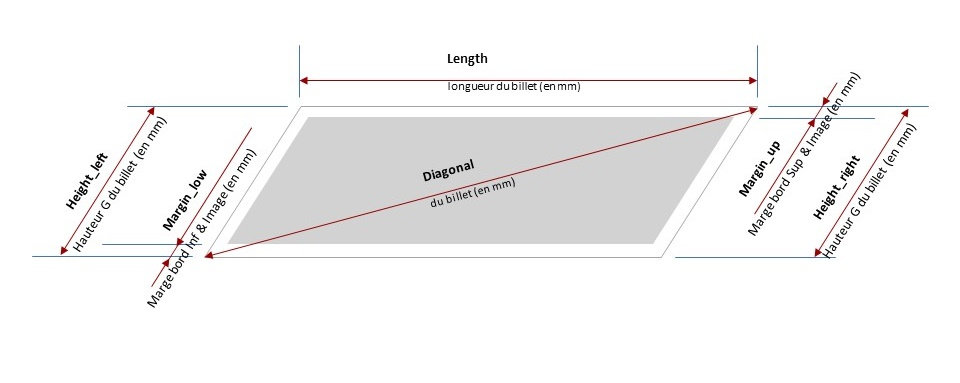

In [2]:
df = pd.read_excel("DATA/notes.xlsx", sheet_name='notes') 
data = df.loc[:, df.columns != 'is_genuine']
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [3]:
df.info()
print(df.shape)
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
is_genuine      170 non-null bool
diagonal        170 non-null float64
height_left     170 non-null float64
height_right    170 non-null float64
margin_low      170 non-null float64
margin_up       170 non-null float64
length          170 non-null float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB
(170, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.00,170.00,170.00,170.00,170.00,170.00
unique,2,nan,nan,nan,nan,nan,nan
top,True,nan,nan,nan,nan,nan,nan
freq,100,nan,nan,nan,nan,nan,nan
mean,NaN,171.94,104.07,103.93,4.61,3.17,112.57
std,NaN,0.31,0.30,0.33,0.70,0.24,0.92
min,NaN,171.04,103.23,103.14,3.54,2.27,109.97
25%,NaN,171.73,103.84,103.69,4.05,3.01,111.85
50%,NaN,171.94,104.06,103.95,4.45,3.17,112.84
75%,NaN,172.14,104.29,104.17,5.13,3.33,113.29


In [4]:
df_true = df[df['is_genuine'] == True].copy()
df_false = df[df['is_genuine'] == False].copy()

### DIFFERENCES DES MOYENNES ENTRE VRAIS ET FAUX BILLETS

In [5]:
print("DIFFERENCES DES MOYENNES ENTRE VRAIS ET FAUX BILLETS")
print("----------------------------------------------------")
print("- Ecart diagonal      => ", df_true.diagonal.mean() - df_false.diagonal.mean())
print("- Ecart height_left   => ", df_true.height_left.mean() - df_false.height_left.mean())
print("- Ecart height_right  => ", df_true.height_right.mean() - df_false.height_right.mean())
print("- Ecart margin_low    => ", df_true.margin_low.mean() - df_false.margin_low.mean())
print("- Ecart margin_up     => ", df_true.margin_up.mean() - df_false.margin_up.mean())
print("- Ecart length        => ", df_true.length.mean() - df_false.length.mean())

DIFFERENCES DES MOYENNES ENTRE VRAIS ET FAUX BILLETS
----------------------------------------------------
- Ecart diagonal      =>  0.08624285714290636
- Ecart height_left   =>  -0.27892857142857963
- Ecart height_right  =>  -0.369671428571408
- Ecart margin_low    =>  -1.1380714285714255
- Ecart margin_up     =>  -0.2790714285714291
- Ecart length        =>  1.5464857142857085


#### Ici la Question induite serait :  Est-ce cet ecart de moyenne est Statisquement significatif ?

Pour aller plus loin et repondre à cette question, faisons un :
### <font color='darkred'>Test T de Student des moyennes sur ces variables entre les billets VRAIS et FAUX

####  Vérifions SI les variables sont "Gaussiennes"  (si elles suivent une loi normale)

- Test Shapiro, avec Hypothèse Nulle H0 de normalité qui devient fausse si la p-value est < a seuil fixé à 5% (0.05)

In [6]:
# DF - Billets "True"
print("TEST SHAPIRO - Loi Normale - Sur Dataset TRUE")
print("--------------------------------------------------------------------")
shapi = df_true.loc[:, df_true.columns != 'is_genuine']
for column in shapi:
    a = scst.shapiro(shapi[column])[0]
    print("p-Value Shapiro --- ", column, "--- : ", a)

# DF - Billets "False"
print("TEST SHAPIRO - Loi Normale - Sur Dataset FALSE")
print("--------------------------------------------------------------------")
shapi = df_false.loc[:, df_false.columns != 'is_genuine']
for column in shapi:
    a = scst.shapiro(shapi[column])[0]
    print("p-Value Shapiro --- ", column, "--- : ", a)

TEST SHAPIRO - Loi Normale - Sur Dataset TRUE
--------------------------------------------------------------------
p-Value Shapiro ---  diagonal --- :  0.9897712469100952
p-Value Shapiro ---  height_left --- :  0.971525251865387
p-Value Shapiro ---  height_right --- :  0.9721167087554932
p-Value Shapiro ---  margin_low --- :  0.9804797768592834
p-Value Shapiro ---  margin_up --- :  0.9741992354393005
p-Value Shapiro ---  length --- :  0.9780517816543579
TEST SHAPIRO - Loi Normale - Sur Dataset FALSE
--------------------------------------------------------------------
p-Value Shapiro ---  diagonal --- :  0.9561797976493835
p-Value Shapiro ---  height_left --- :  0.989495575428009
p-Value Shapiro ---  height_right --- :  0.9671629071235657
p-Value Shapiro ---  margin_low --- :  0.9776208400726318
p-Value Shapiro ---  margin_up --- :  0.9755792021751404
p-Value Shapiro ---  length --- :  0.9817308187484741


#### Toutes les variables sont gaussiennes, avec des p-values elevées (toutes > 95%)   
On peut donc faire :  
- un test de Barlett sur les variances (Hypothèse nulle H0 = Egalité des variances des variables sur les groupes True & False)
- un Test de Student sur les moyennes

In [7]:
print("TEST BARTLETT - Comparaison des Variances - Datasets TRUE vs FALSE")
print("--------------------------------------------------------------------")
bar_true = df_true.loc[:, df_true.columns != 'is_genuine']
bar_false = df_false.loc[:, df_false.columns != 'is_genuine']
for column in bar_true:
    a = scst.bartlett(bar_true[column], bar_false[column])
    print("La p-value de la variable ['", column, "'] du Test de Bartlett sur les Groupes True & False est :", a[1])

TEST BARTLETT - Comparaison des Variances - Datasets TRUE vs FALSE
--------------------------------------------------------------------
La p-value de la variable [' diagonal '] du Test de Bartlett sur les Groupes True & False est : 0.7544170098956573
La p-value de la variable [' height_left '] du Test de Bartlett sur les Groupes True & False est : 0.003976965959594022
La p-value de la variable [' height_right '] du Test de Bartlett sur les Groupes True & False est : 0.19955865324739466
La p-value de la variable [' margin_low '] du Test de Bartlett sur les Groupes True & False est : 8.937396975572797e-07
La p-value de la variable [' margin_up '] du Test de Bartlett sur les Groupes True & False est : 0.554794849415443
La p-value de la variable [' length '] du Test de Bartlett sur les Groupes True & False est : 1.822868265046285e-07


In [8]:
print("TEST t STUDENT - Comparaison des Moyennes - Datasets TRUE vs FALSE")
print("--------------------------------------------------------------------")
bar_true = df_true.loc[:, df_true.columns != 'is_genuine']
bar_false = df_false.loc[:, df_false.columns != 'is_genuine']
for column in bar_true:
    a = scst.ttest_ind(bar_true[column], bar_false[column], equal_var=True)
    print("La p-value de la variable ['", column, "'] du Test (t) de Student sur les Groupes True & False est :", a[1])

TEST t STUDENT - Comparaison des Moyennes - Datasets TRUE vs FALSE
--------------------------------------------------------------------
La p-value de la variable [' diagonal '] du Test (t) de Student sur les Groupes True & False est : 0.07018967008887296
La p-value de la variable [' height_left '] du Test (t) de Student sur les Groupes True & False est : 2.3342002888499904e-10
La p-value de la variable [' height_right '] du Test (t) de Student sur les Groupes True & False est : 6.665246409290165e-15
La p-value de la variable [' margin_low '] du Test (t) de Student sur les Groupes True & False est : 3.940145276272617e-39
La p-value de la variable [' margin_up '] du Test (t) de Student sur les Groupes True & False est : 7.567386063614238e-17
La p-value de la variable [' length '] du Test (t) de Student sur les Groupes True & False est : 1.2348226459862946e-43


#### <font color='darkred'>CONCLUSION (Test (t) de Student :
Les "p-value" hormis la diagonalet nous permettent de rejeter (très facilement) l'hypothèse nulle H0 même avec un risque
alpha = 1%   
L'égalité des moyennes sur l'ensemble des variables (hors diagonale) des deux echantillons billets VRAIS & FAUX.

On peut le constater avec des graphes un peu plus bas

### ANALYSE DES MARGES (hautes & basses) sur les Billets

- Calcul de coeeficients de Corrélation de Pearson entre les Marges des vrais et faux billets.

La meilleure approximation linéaire du Model 'TRUE' est de la forme (yt = rt.x + bt) avec :
   rt =  [[-1.03579664]]
   bt =  [7.30837663]
La meilleure approximation linéaire du Model 'FALSE' est de la forme (yf = rf.x + bf) avec :
   rf =  [[-1.80607241]]
   bf =  [11.30404887]
VRAIS BILLETS - Coeff.correlation Pearson margin_up/margin_low  ---  rt = -0.65119
FAUX  BILLETS - Coeff.correlation Pearson margin_up/margin_low  ---  rf = -0.61812


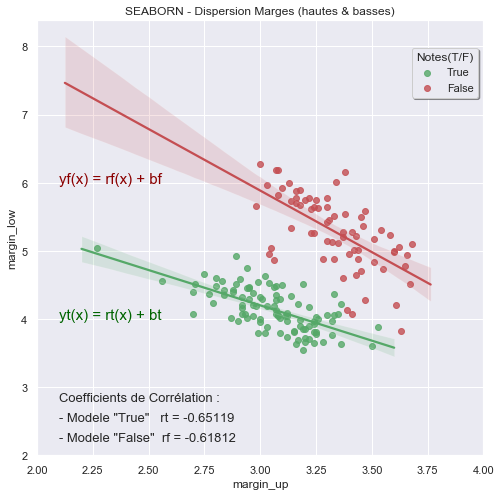

In [9]:
from sklearn.linear_model import LinearRegression
xt = df_true[['margin_up']]
yt = df_true[['margin_low']]
xf = df_false[['margin_up']]
yf = df_false[['margin_low']]
model_true = LinearRegression()
model_false = LinearRegression()
results_true = model_true.fit(xt, yt)
results_false = model_false.fit(xf, yf)
rt = results_true.coef_
bt = results_true.intercept_
rf = results_false.coef_
bf = results_false.intercept_

print("La meilleure approximation linéaire du Model 'TRUE' est de la forme (yt = rt.x + bt) avec :")
print("   rt = ", rt)
print("   bt = ", bt)
print("La meilleure approximation linéaire du Model 'FALSE' est de la forme (yf = rf.x + bf) avec :")
print("   rf = ", rf)
print("   bf = ", bf)

rt = scst.pearsonr(df_true['margin_up'], df_true['margin_low'])[0]
rf = scst.pearsonr(df_false['margin_up'], df_false['margin_low'])[0]
print("VRAIS BILLETS - Coeff.correlation Pearson margin_up/margin_low  ---  rt =", round(rt,5))
print("FAUX  BILLETS - Coeff.correlation Pearson margin_up/margin_low  ---  rf =", round(rf,5))

sns.set()
data = df[['margin_up', 'margin_low', 'is_genuine']].copy()
plt.figure(figsize = (8, 8))

# GRAPHE DE GAUCHE - PLOTS & Droite Regression avec SEABORN
# plt.subplot(1,2,1)
#ax = sns.scatterplot(x="margin_up", y="margin_low", hue="is_genuine", data=data)
ax1 =  sns.regplot(x="margin_up", y="margin_low", data=df_true, label="True", color = 'g')
ax2 =  sns.regplot(x="margin_up", y="margin_low", data=df_false, label="False", color = 'r')
plt.legend(loc='center right', bbox_to_anchor=(1, 0.88), ncol=1, shadow=True, title="Notes(T/F)")
plt.title("SEABORN - Dispersion Marges (hautes & basses)")
plt.ylim(2, None)
plt.xlim(2, 4)
# ajout de texte à un endroit d'un graphe, en indiquant les coordonnées x et y # par rapport 
# à celle du graphe (avec ici une partie écrite en latex entre les deux signes $, pour les formules).
plt.text(2.1, 4, 'yt(x) = rt(x) + bt', color = 'darkgreen', size=15)
plt.text(2.1, 6, 'yf(x) = rf(x) + bf', color = 'darkred', size=15)
plt.text(2.1, 2.8, 'Coefficients de Corrélation :', size=13)
t1 = '- Modele "True"   rt = ' + str(round(rt, 5))
t2 = '- Modele "False"  rf = ' + str(round(rf, 5))
plt.text(2.1, 2.5, t1, size=13)
plt.text(2.1, 2.2, t2, size=13)
plt.savefig('OUTFILES/Marges_corr_lin_1.png', dpi=100, bbox_inches='tight')

plt.show()
plt.close()

### <font color='darkred'>// Commentaires Marges :

- Il existe une corrélation linéaire négative entre la marge Haute et la marge basse.
- Le calcul du coefficient nous indique qu'elle est serait légèrement plus signicative (proche de -1) pour les VRAIS billets que pour les FAUX.  Chose que l'on constate aussi un peu graphiquement

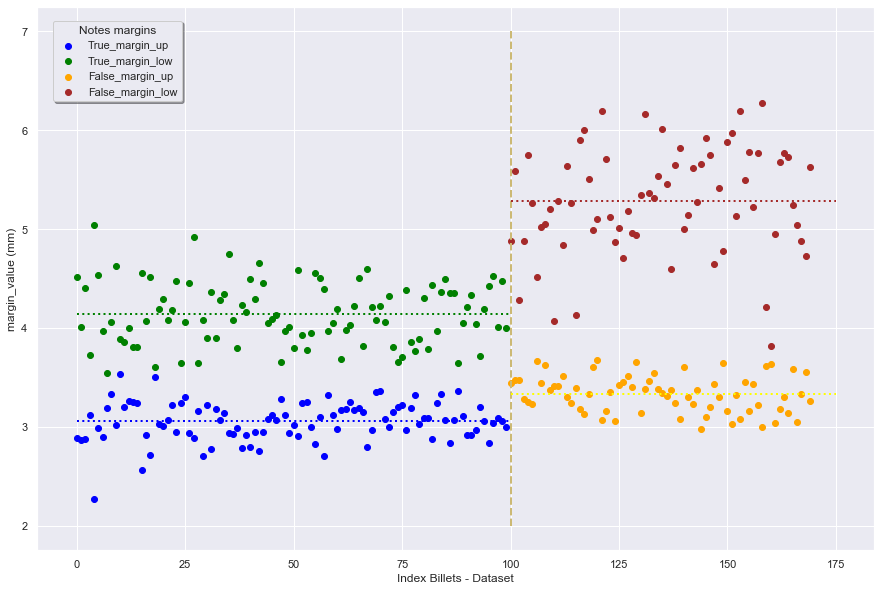

In [10]:
sns.set()
plt.figure(figsize = (15, 10))
plt.scatter(df_true.index,df_true['margin_up'], color = 'blue', label="True_margin_up")
plt.scatter(df_true.index,df_true['margin_low'], color = 'green', label="True_margin_low")
plt.scatter(df_false.index,df_false['margin_up'], color = 'orange', label="False_margin_up")
plt.scatter(df_false.index,df_false['margin_low'], color = 'brown', label="False_margin_low")
plt.legend(loc='center right', bbox_to_anchor=(0.18, 0.9), ncol=1, shadow=True, title="Notes margins")
plt.plot([100.0, 100.0], [2.0, 7.0], 'y--', lw=2) # Blue dashed straight line
plt.xlabel("Index Billets - Dataset")
plt.ylabel("margin_value (mm)")

# Droites d'equations des moyennes 
x1 = df_true['margin_up'].mean()
x2 = df_true['margin_low'].mean()
x3 = df_false['margin_up'].mean()
x4 = df_false['margin_low'].mean()
plt.plot([0, 100.0], [x1, x1], ':', color = 'blue', lw=2)   # Blue dotted line 
plt.plot([0, 100.0], [x2, x2], ':', color = 'green', lw=2)  # Green dotted line 
plt.plot([100, 175.0], [x3, x3], ':', color = 'yellow', lw=2) # Orange dotted line 
plt.plot([100, 175.0], [x4, x4], ':', color = 'brown', lw=2)  # Brown dotted line 

plt.savefig('OUTFILES/Marges_plot_ordre_dataset.png', dpi=100, bbox_inches='tight')

plt.show()
plt.close()

### <font color='darkred'>// Commentaires Marges :

- Les valeurs Moyenne des marges Hautes et Basses des Faux Billets sont respectivement supérieures à leur homologues des Vrais Billets

### ANALYSE DES HAUTEURS (Gauche & Droite) sur les Billets


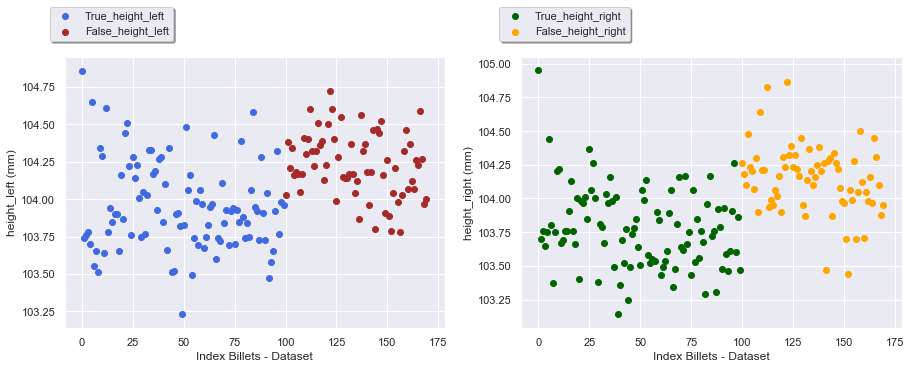

In [11]:
sns.set()
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.scatter(df_true.index,df_true['height_left'], color = 'royalblue', label="True_height_left")
plt.scatter(df_false.index,df_false['height_left'], color = 'brown', label="False_height_left")
plt.legend(loc='center right', bbox_to_anchor=(0.3, 1.12), ncol=1, shadow=True)
plt.xlabel("Index Billets - Dataset")
plt.ylabel("height_left (mm)")


plt.subplot(1,2,2)
plt.scatter(df_true.index,df_true['height_right'], color = 'darkgreen', label="True_height_right")
plt.scatter(df_false.index,df_false['height_right'], color = 'orange', label="False_height_right")
plt.legend(loc='center right', bbox_to_anchor=(0.3, 1.12), ncol=1, shadow=True)
plt.xlabel("Index Billets - Dataset")
plt.ylabel("height_right (mm)")

plt.savefig('OUTFILES/Hauteurs_Billets.png', dpi=100, bbox_inches='tight')

plt.show()
plt.close()

### CONTROLE DE LA VALEUR DE LA DIAGONALE DU DATASET - "True"

In [12]:
dfctrl = df.copy()
dfctrl['calc_diag_moy'] = np.sqrt(((dfctrl.height_left+dfctrl.height_right)/2)**2 
                                  + dfctrl.length**2)
dfctrl['calc_diag_moy_avec_marg'] = np.sqrt(((dfctrl.height_left+dfctrl.height_right+dfctrl.margin_low+dfctrl.margin_up)/2)**2 
                                  + dfctrl.length**2)
# print(dfctrl.describe(include='all'))
dfctrl.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,calc_diag_moy,calc_diag_moy_avec_marg
0,True,171.81,104.86,104.95,4.52,2.89,112.83,154.06,156.61
1,True,171.67,103.74,103.70,4.01,2.87,113.29,153.60,155.94
2,True,171.83,103.76,103.76,4.40,2.88,113.84,154.03,156.51
3,True,171.80,103.78,103.65,3.73,3.12,113.63,153.85,156.18
4,True,172.05,103.70,103.75,5.04,2.27,113.55,153.79,156.28


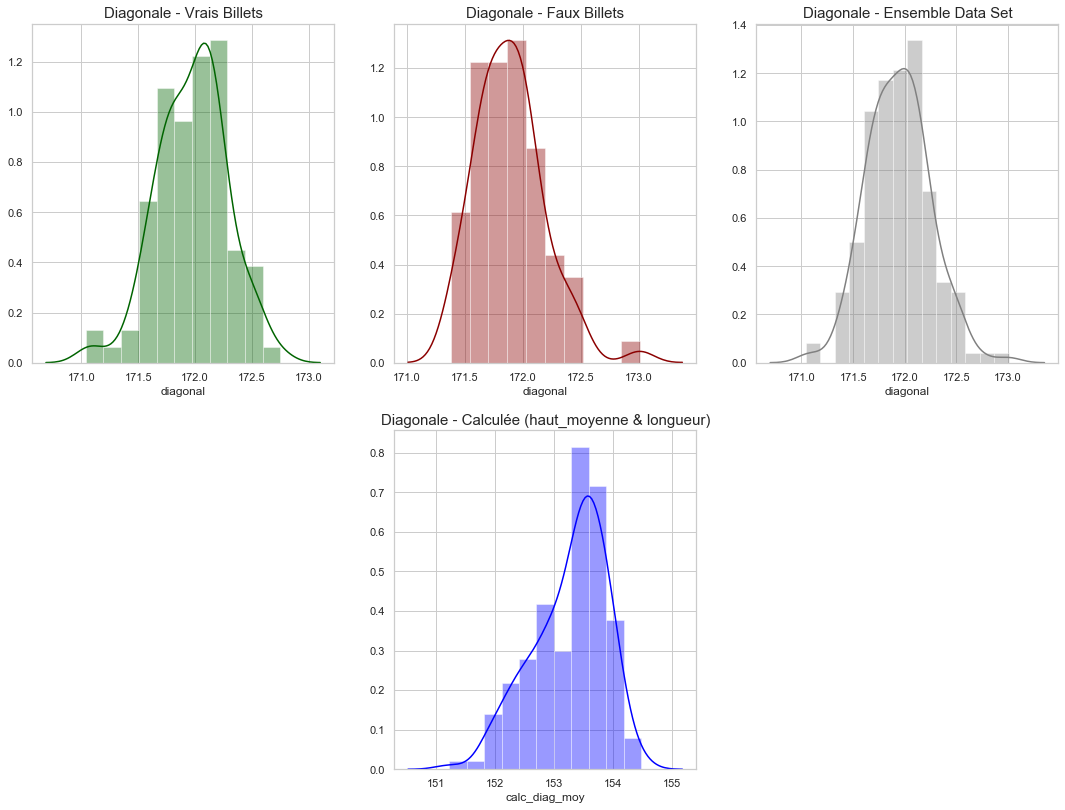

In [13]:
sns.set_style("whitegrid")
fig = plt.figure()
plt.subplot(3,3,1)
ax = sns.distplot(df_true['diagonal'], color = 'darkgreen')
plt.title("Diagonale - Vrais Billets", size=15)

plt.subplot(3,3,2)
ax = sns.distplot(df_false['diagonal'], color = 'darkred')
plt.title("Diagonale - Faux Billets", size=15)

plt.subplot(3,3,3)
ax = sns.distplot(dfctrl['diagonal'], color = 'grey')
plt.title("Diagonale - Ensemble Data Set",size=15)

plt.subplot(3,3,5)
ax = sns.distplot(dfctrl['calc_diag_moy'], color = 'blue')
plt.title("Diagonale - Calculée (haut_moyenne & longueur)", size=15)

plt.subplots_adjust(bottom=0, right=2.5, top=4)
plt.savefig('OUTFILES/Diagonales_Billets.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

La diagonale n'est pas un critère d'élimination a proprement parler...

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>M1 - Analyse en Composantes Principales</u></font> : ACP

- <b>Analyse de l'éboulis des valeurs propres  
- Représentation des variables par le cercle des corrélations
- Représentation des individus par les plans factoriels
- Analyser la qualité de représentation et la contribution des individus</b>  

### REMARQUE :  
- je choisis de retirer la variable **is_guenine**, afin de ne conserver que des variables quantitatives pour l'ACP  


In [14]:
# choix du nombre de composantes à calculer
n_comp = 6

# Import de l'échantillon  & Selection des colonnes à prendre en compte dans l'ACP
data_pca = df.loc[:, df.columns != 'is_genuine']
# data_pca = df.copy()
# try:
#     data_pca.drop(columns = ['is_genuine'], inplace=True)
# except:
#     print("Colonnes deja supprimées !")

# préparation des données pour l'ACP
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.fillna(data_pca.mean()) 
X = data_pca.values
# Stockage des "Libellés" pour utilisation ultérieure (Cercle Corrélations, Plan Fact.)
names = data_pca.index           
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
X_projected = pca.fit_transform(X_scaled)

# Constitution d'un Dataframe "Resultat" pour l'ACP
dfacp = pd.DataFrame(X_projected, index=data_pca.index, 
                       columns=["F"+str(i+1) for i in range(n_comp)])
dfacp.head()

,F1,F2,F3,F4,F5,F6
0,2.15,1.60,1.79,2.43,0.70,-1.27
1,-2.11,-0.53,0.54,0.34,0.07,-0.54
2,-1.97,-0.05,0.86,0.37,-0.42,0.08
3,-2.06,-0.09,-0.53,0.52,-0.03,-0.04
4,-2.40,0.41,3.32,-0.84,-0.42,-0.45


#### EBOULIS DES VALEURS PROPRES

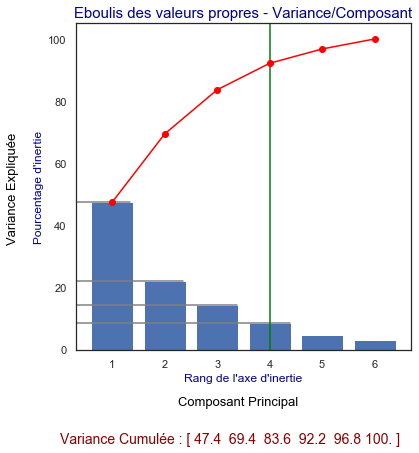

In [15]:
sns.set_style("white")
# Eboulis des valeurs propres
plt.figure(figsize=(6,6))
v = np.cumsum(pca.explained_variance_ratio_)*100

plt.axhline(v[0], xmax=0.16, color="grey")
plt.axhline(v[1]-v[0], xmax=0.32, color="grey")
plt.axhline(v[2]-v[1], xmax=0.48, color="grey")
plt.axhline(v[3]-v[2], xmax=0.64, color="grey")
plt.axvline(4, color="green")

plt.text(-1,35, "Variance Expliquée", color = 'black', size=13, rotation=90)
plt.text(2.25,-18, "Composant Principal", color = 'black', size=13)
plt.text(0,-30, "Variance Cumulée : %s" %np.round(v, 1), color = 'darkred', size=14)
plt.xlabel('', color = 'darkblue', size=12)
plt.ylabel('', color = 'darkblue', size=12)

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres - Variance/Composant", size=15, color='darkblue')
plt.savefig('OUTFILES/ACP-Eboulis_Valeurs_Propres_PJ6.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

#### Je choisis un seuil de 90% de variance expliquée, à partir duquel je ne conserverais pas les variables issues de l'ACP.  
#### ICI, F5 & F6 seront donc retirées pour la suite de l'étude.

#### CERCLE DES CORRELATIONS - sur Variables (F1-F2-F3-F4)

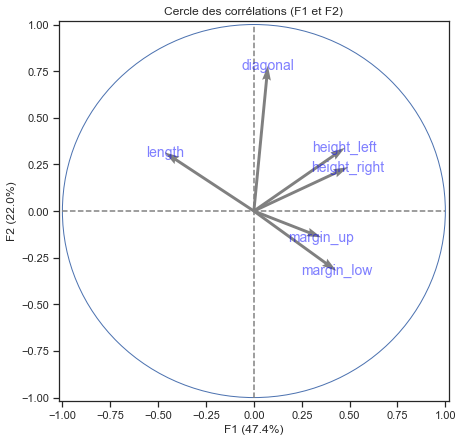

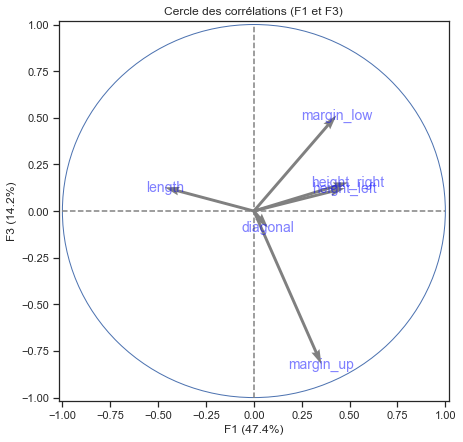

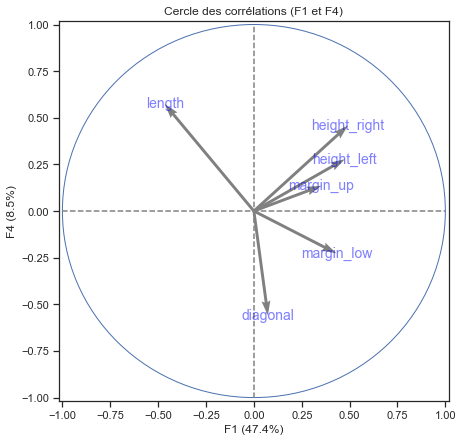

In [16]:
sns.set_style("ticks")
# Cercle des corrélations
pcs = pca.components_

#  // F1-F2// F1-F3 // F1-F4 //
i = 1
while i < 4:
    display_circles(pcs, n_comp, pca, [(0,i)], labels = np.array(features), label_rotation=0, 
                    lims=[-1.02, 1.02, -1.02, 1.02], figsiz=[7, 7])
    savefile = "OUTFILES/Etude-Cercle_Corr_Plan_F1F"+ str(i+1)+".png"
    plt.savefig(savefile, dpi=100, bbox_inches='tight')
    i += 1

plt.show()
plt.close()

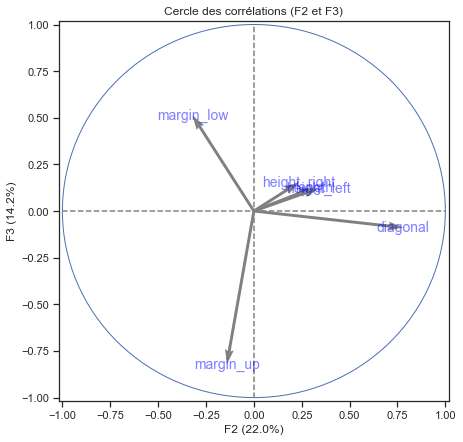

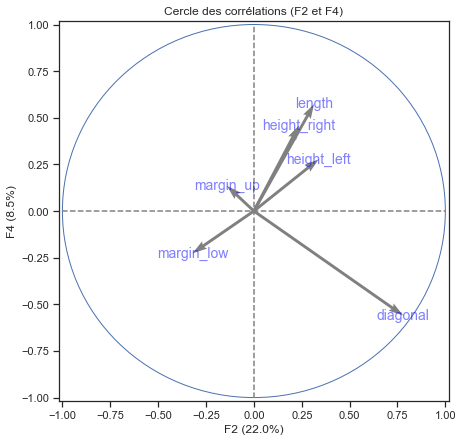

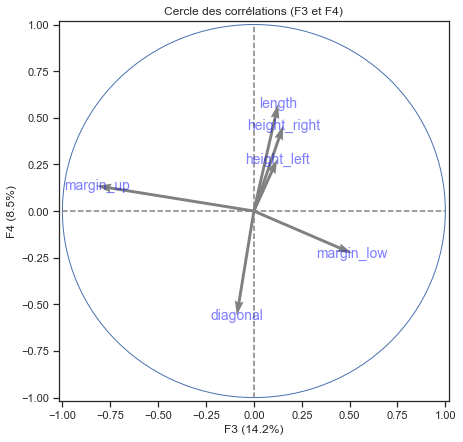

In [17]:
sns.set_style("ticks")
#  // F2-F3// F2-F4 // F3-F4 //
i = 1
while i < 3:
    j = 2
    while j < 4:
        if i < j:
            display_circles(pcs, n_comp, pca, [(i,j)], labels = np.array(features), label_rotation=0, 
                            lims=[-1.02, 1.02, -1.02, 1.02], figsiz=[7, 7])
            savefile = "OUTFILES/Etude-Cercle_Corr_Plan_F"+str(i+1)+"F"+str(j+1)+".png"
            plt.savefig(savefile, dpi=100, bbox_inches='tight')
        j += 1
    i += 1
    
plt.show()
plt.close()

#### PROJECTION Nature Billets (vrais/faux) sur les Plans Factoriel (F1-F2-F3-F4)

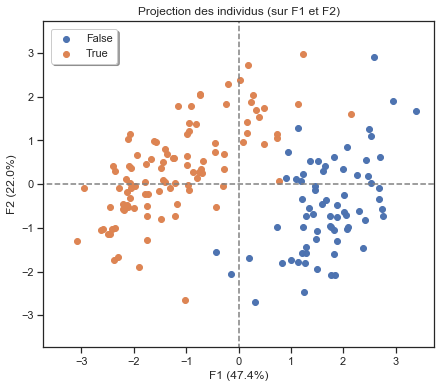

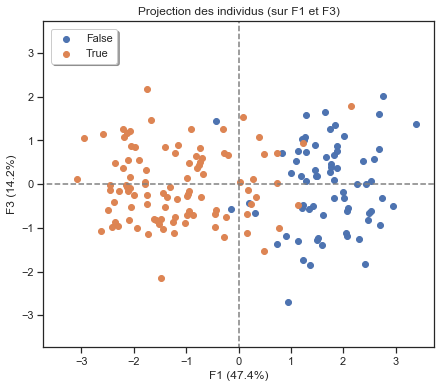

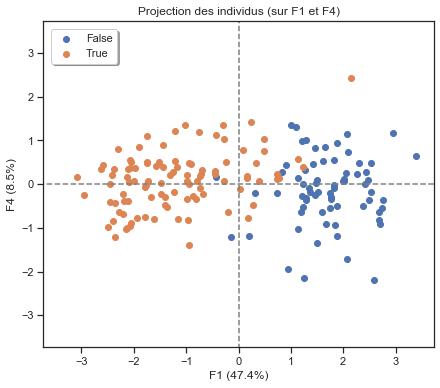

In [18]:
#  // F1-F2// F1-F3 // F1-F4 //
i = 1
while i < 4:
    display_factorial_planes(X_projected, n_comp, pca, [(0,i)], 
                             illustrative_var = df.is_genuine, alpha = 0.99)
    savefile = "OUTFILES/Projections Individus_Plan_F1F"+ str(i+1)+".png"
    plt.savefig(savefile, dpi=100, bbox_inches='tight')
    i += 1

plt.show()
plt.close()

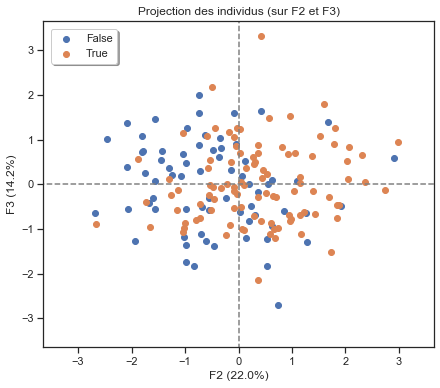

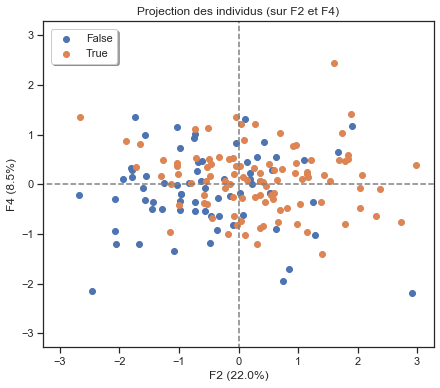

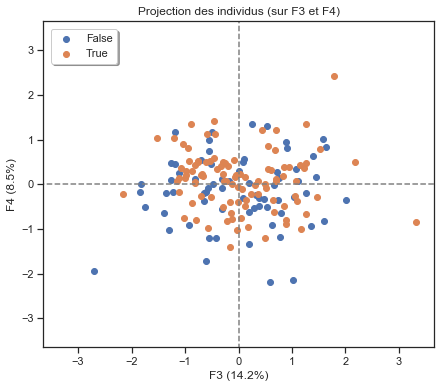

In [19]:
#  // F2-F3// F2-F4 // F3-F4 //
i = 1
while i < 3:
    j = 2
    while j < 4:
        if i < j:
            display_factorial_planes(X_projected, n_comp, pca, [(i,j)], 
                                     illustrative_var = df.is_genuine, alpha = 0.99)
            savefile = "OUTFILES/Projections Individus_Plan_F"+str(i+1)+"F"+str(j+1)+".png"
            plt.savefig(savefile, dpi=100, bbox_inches='tight')
        j += 1
    i += 1
    
plt.show()
plt.close()

### Interpreter la qualité de representation  
(cours --> https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5280031-representez-les-individus-sur-les-plans-factoriels)

### Axe F1
#### Question : qu’est-ce qui différencie les billets qui ont une abscisse grande de ceux qui en ont une petite ?
ICI F1 est plutot corrélée aux variables Hauteurs, Marges et longueur, il y a de grandes chances pour que ces individus sur la projection "Billets Faux" (bleus) aient aussi de grandes valeurs pour les variables Hauteur & Marges et de faible valeur pour la longueur. En effet => Corrélation négative entre Marges et Longueur.

#### Ainsi, se déplacer le long des abscisses dans le sens croissant, c’est un peu se déplacer vers des billets "faux" avec des valeurs élevées en Hauteur et en Marges

### Axe F2
#### Question : Qu’est-ce qui différencie deux billets qui ont à peu près la même abscisse, mais des ordonnées très différentes ?
ICI F2 est très corrélée à la variable Diagonale, il y a de grandes chances pour que ces individus sur la projection "Billets Faux" (bleus) aient aussi de grandes valeurs pour ces variables.
#### Ainsi, se déplacer le long des ordonnées dans le sens croissant, c’est un peu se déplacer vers des billets avec une grande valeur en diagonale (mm) mais sans pour autant en savoir plus sur la nature du billets (vrai/faux)

### Axe F3-F4
#### Question : Qu’est-ce qui différencie deux billets qui ont à peu près la même abscisse, mais des ordonnées très différentes ?
ICI F3/F4 ne permettront pas de bien distinguer les vrais des faux billets.


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>M2 - Appliquer un Algorithme de Classification</u></font> : K-Means



#### Visualisation de la partition obtenue dans le premier plan factoriel de l'ACP, puis analyse.



<img src="DATA/K-Means-Def.png" width="500">

#### Je conserve 4 composantes issues de l'ACP : F1 a F4   (qui representent 90% de la variance)



In [20]:
try:
    del dfk 
except NameError:
    print("Le dataframe n'existe pas !!!")
    
dfk = dfacp.loc[:, (dfacp.columns != 'F5') & (dfacp.columns != 'F6')]
dfk.head()

Le dataframe n'existe pas !!!


,F1,F2,F3,F4
0,2.15,1.60,1.79,2.43
1,-2.11,-0.53,0.54,0.34
2,-1.97,-0.05,0.86,0.37
3,-2.06,-0.09,-0.53,0.52
4,-2.40,0.41,3.32,-0.84


<font color='#61210B'><b>Choix des Paramètres pour la fonction K-Means</b></font>  (Préconisation Site Officiel)
    
- n_clusters = 2 --> Dans notre cas (classe1 = vrai, classe2 = faux , par exemple)  
- n_init = 10    --> Le nombre de tentatives trouver les meilleurs baricentre de chaque groupe/classe avant calcul
- max_iter = 300 --> Le nombre de boucles maxi que fera la fonction pour se stabiliser et determiner les centres  
- init = k-means++ --> Methode d'initialisation : Sélectionne "intelligente" des centres de cluster initiaux pour accélérer la convergence.
    

In [21]:
# k-means sur les données centrées et réduites issues de l'ACP
kmeans = cluster.KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001)
kmeans.fit(dfk)

# Permet d'éviter l'erreur suivante :
# SettingWithCopyWarning in Pandas:A value is trying to be set on a copy of a slice from a DataFrame
pd.options.mode.chained_assignment = None  # default='warn'

dfk['is_genuine'] = df.is_genuine
dfk['is_genuine'] = dfk['is_genuine'].map({True: 1, False: 0})
dfk['is_genuine'] = dfk['is_genuine'].astype(int)
dfk['clusterk']  = kmeans.labels_

# Comme nous savons que le nb de clusters kmeans "vrais" est > nb de clusters kmeans "faux"
# on lui assigne le bon n° de cluster afin de comparer avec le DF original
k0 = dfk[dfk["clusterk"] == 0 ]['clusterk'].count()
k1 = dfk[dfk["clusterk"] == 1 ]['clusterk'].count()
if k0 > k1:
    dfk['clusterk'] = dfk['clusterk'].map({0: 1, 1: 0})

pd.options.mode.chained_assignment = 'warn' # reset to default
print("k0 = ", k0, "  /    k1 = ", k1)
dfk.head()


k0 =  76   /    k1 =  94


,F1,F2,F3,F4,is_genuine,clusterk
0,2.15,1.60,1.79,2.43,1,0
1,-2.11,-0.53,0.54,0.34,1,1
2,-1.97,-0.05,0.86,0.37,1,1
3,-2.06,-0.09,-0.53,0.52,1,1
4,-2.40,0.41,3.32,-0.84,1,1


Dans un soucis d'harmonisation j'ai renommé les valeurs des colonnes ainsi :  
- colonne clusterk  : devient 1 -> 0  et 0 devient -> 1
- colonne is_genuine : True devient 1 et False devient 0  


### Question  :  Est-ce que les groupes k-means correspondent aux Groupes "Vrai/Faux" billets ?

In [ ]:
sns.set()
plt.figure(figsize = (15, 7))

plt.subplot(1,2,1)
sns.scatterplot(x=dfk.F1, y=dfk.F2, hue="clusterk",  data=dfk)
legend1 = plt.legend(loc=(-0.1,1), shadow=True)
legend1.texts[0].set_text("Clusters")
legend1.texts[1].set_text("0 = False / Faux")
legend1.texts[2].set_text("1 = True / Vrais")

plt.title("Groupe/Cluster après k-means")

plt.subplot(1,2,2)
sns.scatterplot(x=dfk.F1, y=dfk.F2, hue="is_genuine",  data=dfk)
legend2 = plt.legend(loc=(-0.1,1), shadow=True)
legend2.texts[0].set_text("Nature Origine")
legend2.texts[1].set_text("0 = False / Faux")
legend2.texts[2].set_text("1 = True / Vrais")
plt.title("Billets Dataset (True/False)")

plt.savefig('OUTFILES/Projections Groupes K-Means - 1er PF_ACP.png', dpi=100, bbox_inches='tight')

plt.show()

<img src="DATA/sklearn_conf_matrix.png" width="500">

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dfk.is_genuine, dfk.clusterk)

im_mat = plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar(im_mat)
plt.text(-0.3,-1.25, " PREDICTED", size=25)
plt.text(-0.2,-0.9, "FAUX            VRAIS", size=15)
plt.text(-0.3,-0.1, (cm[0,0]), color = 'white', size=20)
plt.text(-0.3, 0.9, (cm[1,0]), color = 'red', size=20)
plt.text(-1.35, 0.9, "ACTUAL", size=25, rotation=90)
plt.text(-0.9,1.1, "VRAIS        FAUX", size=15, rotation=90)
plt.text(0.7, -0.1, (cm[0,1]), color = 'red', size=20)
plt.text(0.7, 0.9, (cm[1,1]), color = 'white', size=20)
# plt.text(-1.5,2, "Taux de Correspondance Algorithme K-Means / Origine :                 %", size=15, color="darkblue")
# plt.text(2.9,2, tx_corr_k_init, size=15, color="darkblue")
plt.savefig('OUTFILES/Matrice_conf_kmeans.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
accu = np.round(100*(cm[0,0]+cm[1,1]) / np.sum(cm), 3)
tpr  = np.round(100*cm[0,0] / np.sum(cm, axis=1)[0], 3)
fpr  = np.round(100*cm[1,0] / np.sum(cm, axis=0)[0], 3)
print("")
print("ACC - La Précision   (Accuracy) - Somme Resultats 'true' / Total          -- ", accu, "(%)")
print("")
print("TPR - La Sensitivité (True Positive Rate) - Detection de Faux Billets     -- ", tpr, "(%)")
print("")
print("FPR - Le 'Fall Out' (False positive rate) - Probabilité de fausse alarme  -- ", fpr, "(%)")

* Accuracy / Précision  :  (69+93) / 170  
* Taux erreur :  (7+1)/ 170  


* Probabilité  TPR (True Pos.Rate - Recall)  (Sensitivité FR)  
--> Detection de Faux Billets :  69 / 70


* Probabilité de Fausse Alarme  
--> Cout de Recherche (FPR False pos.rate - Fall Out) :   Nb billets trouvés "faux" /  Total des Faux
Ici  (7) / (69 + 7)

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>Export des Dataframes</u></font> :
#### Dans fichiers csv - Pour Régression Logistique

In [ ]:
df.to_csv('OUTFILES/df.csv', sep=',', encoding='utf-8', index=False)
df_true.to_csv('OUTFILES/df_true.csv', sep=',', encoding='utf-8', index=False)
df_false.to_csv('OUTFILES/df_false.csv', sep=',', encoding='utf-8', index=False)
dfacp.to_csv('OUTFILES/dfacp.csv', sep=',', encoding='utf-8', index=False)

dfk.to_csv('OUTFILES/dfk.csv', sep=',', encoding='utf-8', index=False)

In [ ]:
dureetotale = round(time.time() - trt_start_time, 5)
print("--- Durée TOTALE du Notebook PJ6 - ACP & k-Means --- ", "%s seconds" % dureetotale)